# notebook overview:

- In this notebook we inference our saved model
- First we create a list of images with whom we want to inference our model
- Then we load the model
- Finally we plot our predictions using the opencv libary


In [ ]:
#connect to our drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Cloning TFOD 2.0 Github** needed for inferencing

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 68944, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 68944 (delta 50), reused 74 (delta 42), pack-reused 68860
Receiving objects: 100% (68944/68944), 577.22 MiB | 32.47 MiB/s, done.
Resolving deltas: 100% (48555/48555), done.


In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 28.93 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

### Install the Object Detection API

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.1 MB 8.2 MB/s 
     |████████████████████████████████| 352 kB 55.2 MB/s 
     |████████████████████████████████| 2.2 MB 34.9 MB/s 
     |████████████████████████████████| 23.4 MB 4.3 MB/s 
     |████████████████████████████████| 99 kB 9.8 MB/s 
     |████████████████████████████████| 1.1 MB 51.3 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 47.7 MB 60 kB/s 
     |████████████████████████████████| 636 kB 49.3 MB/s 
     |████████████████████████████████| 234 kB 59.1

In [ ]:
# From within TensorFlow/models/research/
#test if tensorflow downloaded successfully
!python object_detection/builders/model_builder_tf2_test.py

2022-02-09 10:33:09.574690: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0209 10:33:10.380721 139695361054592 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.63s
I0209 10:33:11.212573 139695361054592 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.63s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.32s
I0209 10:33:12.528638 139695361054592 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_cr

#Create a list of image_paths

In [7]:
import os

In [8]:
#create a list of pcitures filepaths
image_dir= '/content/drive/MyDrive/training_demo/images/train_bohne' 
files = os.listdir(image_dir)
#print(files)
image_list = []
for file in files:
  if file.endswith("jpg"):
    image_list.append(image_dir +"/" + file)
print(image_list)

['/content/drive/MyDrive/training_demo/images/train_bohne/image_tcom4164_Tchibologo_valscore0.9714779.jpg', '/content/drive/MyDrive/training_demo/images/train_bohne/image_tcom5345_Tchibologo_valscore0.8862638.jpg', '/content/drive/MyDrive/training_demo/images/train_bohne/image_tcom4874_Tchibologo_valscore0.90133166.jpg', '/content/drive/MyDrive/training_demo/images/train_bohne/image_tcom4571_Tchibologo_valscore0.86329746.jpg', '/content/drive/MyDrive/training_demo/images/train_bohne/image_tcom4723_Tchibologo_valscore0.8522846.jpg', '/content/drive/MyDrive/training_demo/images/train_bohne/image_tcom4512_Tchibologo_valscore0.7579569.jpg', '/content/drive/MyDrive/training_demo/images/train_bohne/000000011321.jpg', '/content/drive/MyDrive/training_demo/images/train_bohne/000000009580.jpg', '/content/drive/MyDrive/training_demo/images/train_bohne/000000089148.jpg', '/content/drive/MyDrive/training_demo/images/train_bohne/000000046784.jpg', '/content/drive/MyDrive/training_demo/images/train_

##Load the model

In [ ]:
!pip uninstall numpy
!pip install numpy --upgrade

In [ ]:
import tensorflow as tf

In [ ]:
# load the model

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

path_to_saved_model = "/content/drive/MyDrive/training_demo/exported_models/CenterNet_1024x1024_exported/saved_model/saved_model"

print('Loading model...', end='')
start_time = time.time()

# load saved model 
detect_fn = tf.saved_model.load(path_to_saved_model)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...

##inference the model and plot predictions

In [ ]:
#upgrade specific opencv liabaries to have all opencv libaries up to date
!pip uninstall opencv-python
!pip install opencv-python
!pip uninstall opencv-contrib-python
!pip install opencv-contrib-python
!pip uninstall opencv-python-headless
!pip install opencv-python-headless

In [ ]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless

In [ ]:
!pip install opencv-python

In [11]:
pip list

Package                       Version
----------------------------- -------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
apache-beam                   2.36.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
avro-python3                  1.10.2
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca

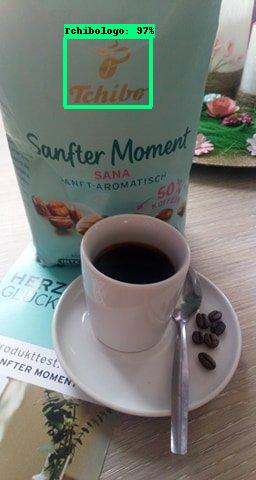

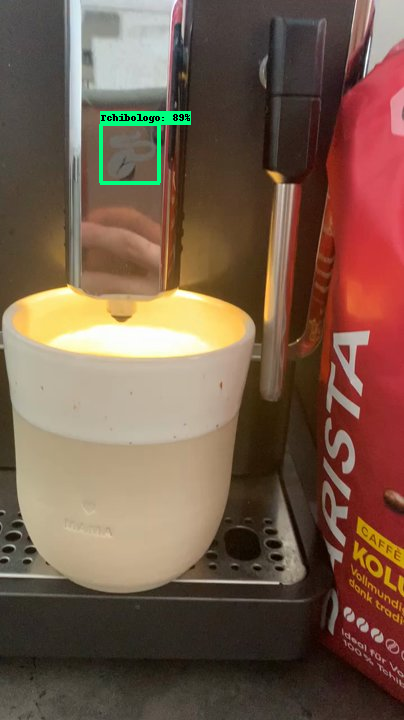

In [10]:
# LOAD LABEL MAP DATA FOR PLOTTING
# PROVIDE PATH TO LABEL MAP
path_to_labels = '/content/drive/MyDrive/training_demo/annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(path_to_labels,
                                                                    use_display_name=True)
#import all packages
import cv2 
from google.colab.patches import cv2_imshow                                                                   
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

#define function to load image inot a numpy array
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

#iterate through image path list and display each detection
i=0
for image_path in image_list:
  if i >1:
    break
  i+=1
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_expanded = np.expand_dims(image_rgb, axis=0)

  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis, ...]

  # input_tensor = np.expand_dims(image_np, 0)
  detections = detect_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections

  # detection_classes should be ints.
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  image_with_detections = image.copy()

  # set min_score_thresh based on your minimum thrshold for detection 
  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=5,
        min_score_thresh=0.1,
        agnostic_mode=False)

  # display output image 
  cv2_imshow(image_with_detections)